## 230968364 Week2
### Exercise 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv("D:\\230968364\\week2\\Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [2]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['medv'].sort_values(ascending=False)

print(correlation_with_target.head(6)) 

medv     1.000000
rm       0.695360
zn       0.360445
black    0.333461
dis      0.249929
chas     0.175260
Name: medv, dtype: float64


### 2. Using sklearn.linear_model, find the multiple regression model for the boston.csvdataset using the best 3 features. (from sklearn.linear_model importLinearRegression) 

In [5]:
X = df[['rm', 'crim', 'tax']]  
y = df['medv']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Model Intercept (beta_0): {model.intercept_}")
print(f"Model Coefficients (beta_1, beta_2, beta_3): {model.coef_}")

Model Intercept (beta_0): -24.009361678800623
Model Coefficients (beta_1, beta_2, beta_3): [ 8.2300581  -0.14339463 -0.01152563]


### 3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

R²: 0.665940870334305
RMSE: 4.949527227688548


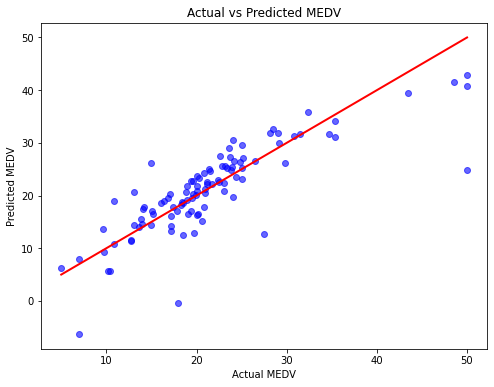

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


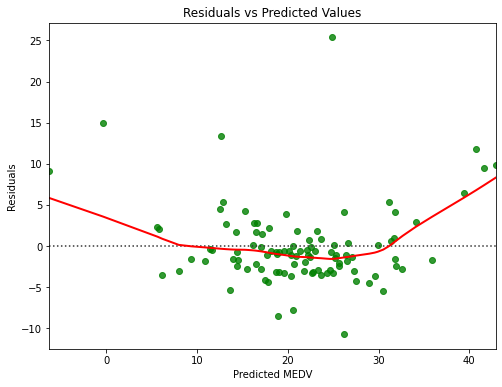

In [9]:
X = df.drop(columns=['medv'])  
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2}")
print(f"RMSE: {rmse}")
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) 
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()